_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [3]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [4]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [5]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [6]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [7]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [8]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [9]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [10]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [11]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [12]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [13]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [46]:
df = income.merge(lifespan).merge(population)

In [47]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [48]:
# we still need region and nice country name

In [49]:
df = pd.merge(df,entities[['country','name','world_6region']],left_on='geo',right_on='country')


In [50]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [51]:
df = df.drop(columns=['country'])

In [52]:
df = df.rename(columns={'geo':'geo','time':'year',
                       'income_per_person_gdppercapita_ppp_inflation_adjusted':'income',
                       'life_expectancy_years':'lifespan',
                       'population_total':'population',
                       'name':'country',
                       'world_6region':'region'})

In [53]:
df

,geo,year,income,lifespan,population,country,region
0,afg,1800,603,28.21,3280000,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,Afghanistan,south_asia
5,afg,1805,603,28.16,3280000,Afghanistan,south_asia
6,afg,1806,603,28.15,3280000,Afghanistan,south_asia
7,afg,1807,603,28.14,3280000,Afghanistan,south_asia
8,afg,1808,603,28.13,3280000,Afghanistan,south_asia
9,afg,1809,603,28.12,3280000,Afghanistan,south_asia


## Explore data

In [54]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [55]:
df.describe(exclude=np.number)

,geo,country,region
count,40437,40437,40437
unique,187,187,6
top,aze,Albania,europe_central_asia
freq,219,219,10778


In [93]:
df['pct_change'] = df['income'].pct_change()
df.loc[df['year'] == 1800,'pct_change'] = 0

,geo,year,income,lifespan,population,country,region,pct_change
0,afg,1800,603,28.21,3280000,Afghanistan,south_asia,0.000000
1,afg,1801,603,28.20,3280000,Afghanistan,south_asia,0.000000
2,afg,1802,603,28.19,3280000,Afghanistan,south_asia,0.000000
3,afg,1803,603,28.18,3280000,Afghanistan,south_asia,0.000000
4,afg,1804,603,28.17,3280000,Afghanistan,south_asia,0.000000
5,afg,1805,603,28.16,3280000,Afghanistan,south_asia,0.000000
6,afg,1806,603,28.15,3280000,Afghanistan,south_asia,0.000000
7,afg,1807,603,28.14,3280000,Afghanistan,south_asia,0.000000
8,afg,1808,603,28.13,3280000,Afghanistan,south_asia,0.000000
9,afg,1809,603,28.12,3280000,Afghanistan,south_asia,0.000000


In [97]:
max_index = df.groupby(['country'])['pct_change'].idxmax()

In [102]:
df_max = df.iloc[max_index]

## Plot visualization

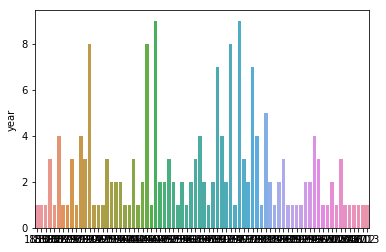

In [112]:
sns.barplot(x=df_max['year'].value_counts().index,y=df_max['year'].value_counts())

Int64Index([1976, 1948, 1924, 1946, 1974, 1979, 1970, 1982, 1919, 1980, 1996,
            1964, 1887, 1972, 1987, 1977, 1933, 1963, 1951, 1942, 1920, 1897,
            1872, 1997, 2004, 1986, 1945, 1937, 1949, 1950, 1953, 1936, 1956,
            1934, 1962, 1967, 1978, 2002, 1984, 1973, 1995, 1969, 1994, 1870,
            1940, 1859, 1903, 1928, 1926, 1927, 1895, 1893, 1882, 1941, 2013,
            1943, 1992, 2010, 2007, 2006, 2005, 2003, 2000, 1999, 1993, 1990,
            1947, 1988, 1985, 1981, 1975, 1968, 2012, 1961, 1954, 1850],
           dtype='int64')

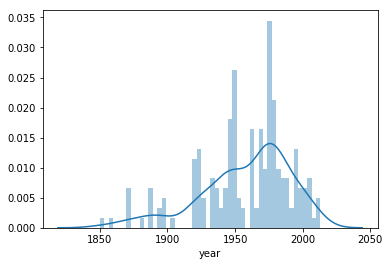

In [115]:
sns.distplot(df_max['year'],bins=50)

## Analyze outliers

In [120]:
from scipy import stats
df_max[(np.abs(stats.zscore(df_max['pct_change'])) > 3)]

,geo,year,income,lifespan,population,country,region,pct_change
657,and,1970,33216,75.95,24276,Andorra,europe_central_asia,1.673535
14526,gnq,1997,6621,50.67,544636,Equatorial Guinea,sub_saharan_africa,1.405013
12970,gab,1974,18403,54.37,636696,Gabon,sub_saharan_africa,1.190573
20215,kwt,1992,50150,78.11,1916877,Kuwait,middle_east_north_africa,1.705838
21111,lby,2012,22907,75.55,6198258,Libya,middle_east_north_africa,1.046547
878,are,1974,145396,67.84,471364,United Arab Emirates,middle_east_north_africa,1.446591


## Plot multiple years

In [123]:
now = df[df['year'] == 2018]

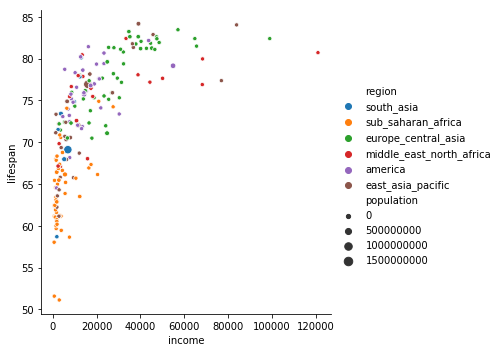

In [124]:
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=now);

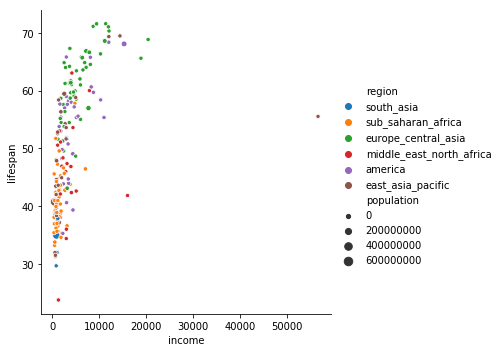

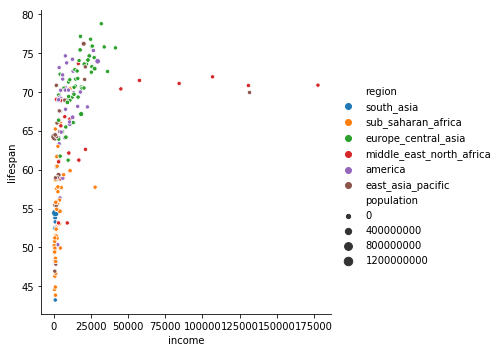

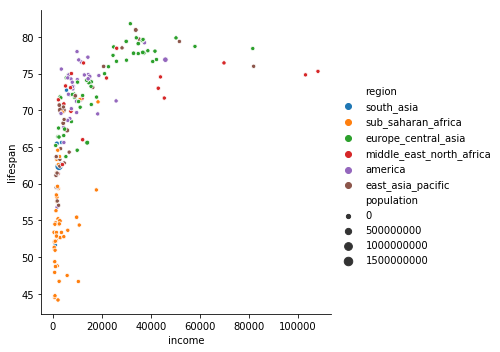

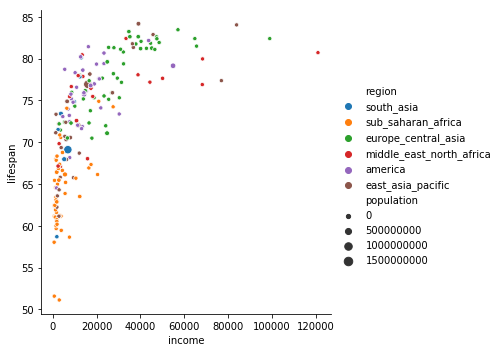

In [145]:
years = [1950, 1980, 2000, 2018]
for year in years:
    sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=df.loc[df['year']==year]);

## Point out a story

In [144]:
'''
Wow! Check out Kuwaits income drop through the invasion. We can see the impact of invasions on country income directly
'''

'\nWow! Check out Kuwaits income drop through the invasion. We can see the impact of invasions on country income directly\n'

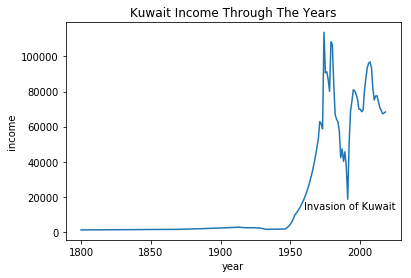

In [146]:
sns.lineplot(y=df[df['country'] == 'Kuwait']['income'],x=df[df['country'] == 'Kuwait']['year'])
plt.title('Kuwait Income Through The Years')
plt.text(x=1960,y=13000,s='Invasion of Kuwait');

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project